<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#Load" data-toc-modified-id="Load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load</a></span><ul class="toc-item"><li><span><a href="#Checks" data-toc-modified-id="Checks-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Checks</a></span></li></ul></li><li><span><a href="#Number-of-samples" data-toc-modified-id="Number-of-samples-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Number of samples</a></span><ul class="toc-item"><li><span><a href="#Zoo-or-Aquarium?" data-toc-modified-id="Zoo-or-Aquarium?-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Zoo or Aquarium?</a></span></li><li><span><a href="#Mammalia:non-Mammalia-ratio" data-toc-modified-id="Mammalia:non-Mammalia-ratio-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Mammalia:non-Mammalia ratio</a></span></li></ul></li><li><span><a href="#Time-series" data-toc-modified-id="Time-series-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Time series</a></span></li><li><span><a href="#Map" data-toc-modified-id="Map-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Map</a></span></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Summarizing dataset

# Var

In [1]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/phyloseq/'

# phyloseq (rarefied)
physeq_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/phyloseq/physeq_r5k.RDS'

# Init

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(phyloseq)
library(ape)
library(stringr)
source('/ebio/abt3_projects/Georg_animal_feces/code/init.R') 


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# Load

In [3]:
# phyloseq object
physeq = readRDS(physeq_file)
physeq

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 30290 taxa and 213 samples ]
sample_data() Sample Data:       [ 213 samples by 171 sample variables ]
tax_table()   Taxonomy Table:    [ 30290 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 30290 tips and 29752 internal nodes ]

In [4]:
# metadata
metadata = physeq %>%
    sample_data %>%
    as.matrix %>%
    as.data.frame %>%
    mutate(collection_date = collection_date %>% as.character,
           collection_date = as.Date(collection_date, format='%m/%d/%y'),
           collection_bin = ntile(collection_date, 10),
           latitude = latitude %>% as.Num, 
           longitude = longitude %>% as.Num)

metadata %>% dfhead

Warning message in class(X) <- NULL:
“Setting class(x) to NULL;   result will no longer be an S4 object”

[1] 213 172


X.SampleID,BarcodeSequence,LinkerPrimerSequence,Primer,ReversePrimer,Barcode_ID,sample_number,host_subject_id,host_german_name,host_common_name,⋯,Cornell_Dilution_DNA_Illumina,Num_Illumina,Num,sorting_454,comments_additional,DNA_box_20180622,sample_vol_20180622,sample_label_20180622,Description,collection_bin
X1.Eurasian.Beaver,ACTCACGGTATG,CATGCTGCCTCCCGTAGGAGT,GCCTCCCTCGCGCCATCAG,AGAGTTTGATCCTGGCTCAG,338R_BC0049,1,1,Biber,Eurasian.Beaver,⋯,4,120,18,18,NA,1,20,1,NA,1
X101.Horse,ACGACGTCTTAG,CATGCTGCCTCCCGTAGGAGT,GCCTCCCTCGCGCCATCAG,AGAGTTTGATCCTGGCTCAG,338R_BC0030,101,101,Hauspferd,Horse,⋯,16,344,160,160,NA,2,20,101,NA,3
X102.Kulan,ACGAGTGCTATC,CATGCTGCCTCCCGTAGGAGT,GCCTCCCTCGCGCCATCAG,AGAGTTTGATCCTGGCTCAG,338R_BC0031,102,102,Khulan,Kulan,⋯,16,345,161,161,NA,2,20,102,NA,3


## Checks

In [5]:
# checks
metadata %>% 
    filter(is.na(collection_date))

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”

X.SampleID,BarcodeSequence,LinkerPrimerSequence,Primer,ReversePrimer,Barcode_ID,sample_number,host_subject_id,host_german_name,host_common_name,⋯,Cornell_Dilution_DNA_Illumina,Num_Illumina,Num,sorting_454,comments_additional,DNA_box_20180622,sample_vol_20180622,sample_label_20180622,Description,collection_bin


# Number of samples

In [6]:
n_species = metadata$scientific_name %>% unique %>% length
cat('Number of species:', n_species, '\n')

Number of species: 128 


In [7]:
n_species = metadata$genus %>% unique %>% length
cat('Number of genera:', n_species, '\n')

Number of genera: 112 


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/16S/1_LLA/.figures/num_samples_byClass.pdf 


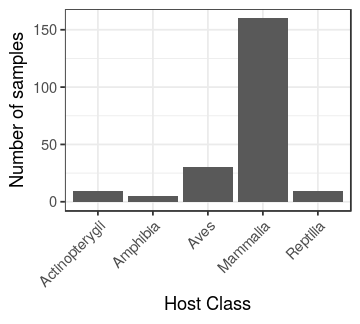

In [8]:
# grouping by class
metadata_s = metadata %>%
    group_by(class) %>%
    summarize(n=n()) %>%
    ungroup()

p = ggplot(metadata_s, aes(class, n)) +
    geom_bar(stat='identity') +
    labs(x='Host Class', y='Number of samples') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

options(repr.plot.width=3, repr.plot.height=2.7)
plot_write(p, file='num_samples_byClass.pdf')

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/16S/1_LLA/.figures/num_samples_byClass-WC.pdf 


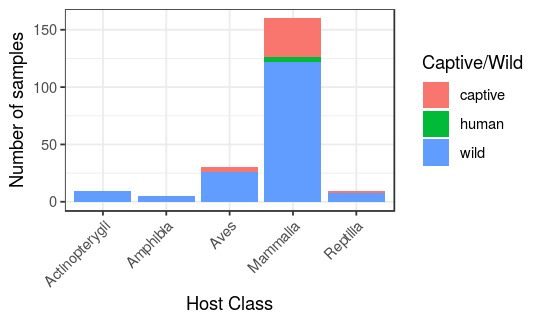

In [9]:
# by wild/captive
metadata_s = metadata %>%
    group_by(class, captive_wild) %>%
    summarize(n=n()) %>%
    ungroup()

p = ggplot(metadata_s, aes(class, n, fill=captive_wild)) +
    geom_bar(stat='identity') +
    scale_fill_discrete('Captive/Wild') +
    labs(x='Host Class', y='Number of samples') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

options(repr.plot.width=4.5, repr.plot.height=2.7)
plot_write(p, file='num_samples_byClass-WC.pdf')

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/16S/1_LLA/.figures/num_species_byClass-WC.pdf 


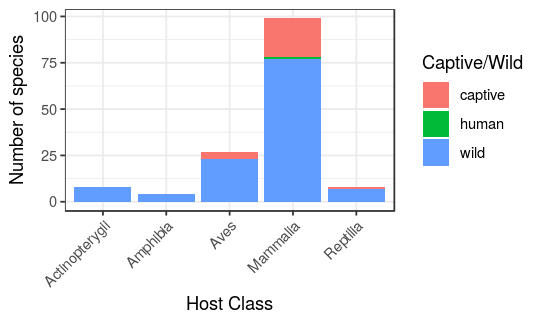

In [10]:
# species by wild/captive
metadata_s = metadata %>%
    distinct(class, scientific_name, captive_wild) %>%
    group_by(class, captive_wild) %>%
    summarize(n=n()) %>%
    ungroup()

p = ggplot(metadata_s, aes(class, n, fill=captive_wild)) +
    geom_bar(stat='identity') +
    scale_fill_discrete('Captive/Wild') +
    labs(x='Host Class', y='Number of species') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

options(repr.plot.width=4.5, repr.plot.height=2.7)
plot_write(p, file='num_species_byClass-WC.pdf')

In [11]:
# fraction that are wild
n_samples = metadata %>% nrow
metadata %>%
    group_by(captive_wild) %>%
    summarize(perc_samples = n() / n_samples * 100) %>%
    ungroup()

captive_wild,perc_samples
captive,18.309859
human,1.877934
wild,79.812207


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/16S/1_LLA/.figures/num_samples_byClass-WC-perc.pdf 


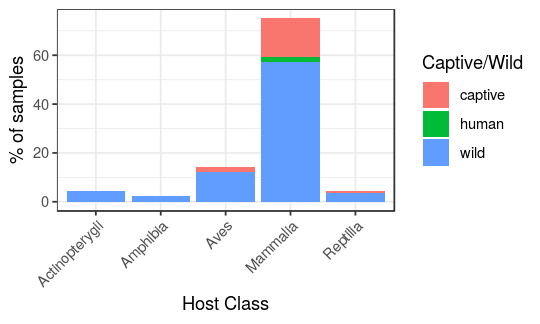

In [12]:
# fraction that are wild
n_samples = metadata %>% nrow
metadata_s = metadata %>%
    group_by(class, captive_wild) %>%
    summarize(perc_samples = n() / n_samples * 100) %>%
    ungroup()

p = ggplot(metadata_s, aes(class, perc_samples, fill=captive_wild)) +
    geom_bar(stat='identity') +
    scale_fill_discrete('Captive/Wild') +
    labs(x='Host Class', y='% of samples') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

options(repr.plot.width=4.5, repr.plot.height=2.7)
plot_write(p, file='num_samples_byClass-WC-perc.pdf')

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/16S/1_LLA/.figures/num_samples-per-sp_byClass.pdf 


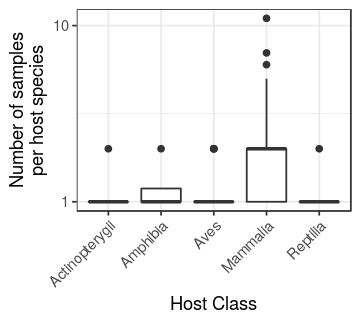

In [13]:
# samples per species
metadata_s = metadata %>%
    group_by(class, scientific_name) %>%
    summarize(n=n()) %>%
    ungroup()

p = ggplot(metadata_s, aes(class, n)) +
    geom_boxplot() +
    scale_y_log10() +
    labs(x='Host Class', y='Number of samples\nper host species') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

options(repr.plot.width=3, repr.plot.height=2.7)
plot_write(p, file='num_samples-per-sp_byClass.pdf')

In [14]:
# samples per host
metadata %>%
    group_by(host_subject_id) %>%
    summarize(n=n()) %>%
    ungroup() %>%
    .$n %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

## Zoo or Aquarium?

In [15]:
# from a zoo
metadata %>%
    mutate(from_zoo = grepl('zoo', geo_feature, ignore.case=TRUE)) %>%
    .$from_zoo %>% table %>% print

.
FALSE  TRUE 
  193    20 


In [16]:
# fraction of captive from zoos?
metadata %>%
    filter(captive_wild == 'captive') %>%
    .$geo_feature %>% as.character %>% table %>% print

.
agricultural feature  constructed feature                 park 
                   5                    9                    2 
     populated place    zoological garden 
                   3                   20 


In [17]:
# fraction of captive from zoos?
metadata %>%
    filter(captive_wild == 'captive') %>%
    .$geo_feature_detail_1 %>% as.character %>% table %>% print

.
         building              city              farm    protected area 
                9                 3                 5                 2 
zoological garden 
               20 


In [18]:
# from an aquarium
metadata %>%
    mutate(from_aquarium = grepl('aquarium', geo_feature, ignore.case=TRUE)) %>%
    .$from_aquarium %>% table %>% print

.
FALSE 
  213 


## Mammalia:non-Mammalia ratio

In [19]:
# species-level
metadata %>%
    mutate(is_mammalia = class == 'Mammalia') %>%
    distinct(is_mammalia, genus, scientific_name) %>%
    group_by(is_mammalia) %>%
    summarize(n = n()) %>%
    ungroup()

is_mammalia,n
FALSE,46
TRUE,82


In [20]:
# fraction that are mammalia
print(82 / (46 + 82))

[1] 0.640625


In [21]:
# genus-level
metadata %>%
    mutate(is_mammalia = class == 'Mammalia') %>%
    distinct(is_mammalia, genus) %>%
    group_by(is_mammalia) %>%
    summarize(n = n()) %>%
    ungroup()

is_mammalia,n
FALSE,43
TRUE,69


In [22]:
# fraction that are mammalia
print(69 / (43 + 69))

[1] 0.6160714


In [23]:
# family-level
metadata %>%
    mutate(is_mammalia = class == 'Mammalia') %>%
    distinct(is_mammalia, family) %>%
    group_by(is_mammalia) %>%
    summarize(n = n()) %>%
    ungroup()

is_mammalia,n
FALSE,31
TRUE,42


In [24]:
# fraction that are mammalia
print(31 / (31 + 42))

[1] 0.4246575


# Time series

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/16S/1_LLA/.figures/collect-date.pdf 


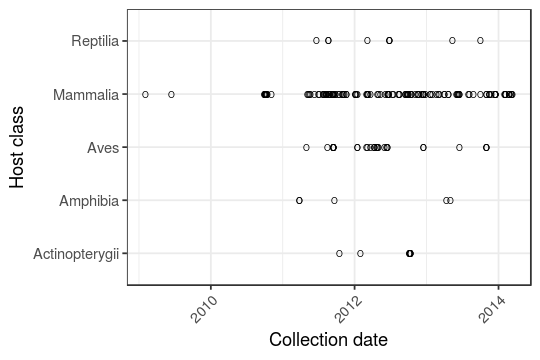

In [25]:
p = ggplot(metadata, aes(collection_date, class)) +
    geom_point(shape='O') +
    labs(x='Collection date', y='Host class') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

options(repr.plot.width=4.5, repr.plot.height=3)
plot_write(p, file='collect-date.pdf')

# Map

In [26]:
# formatting for mapping
df_map = metadata %>%
    dplyr::select(X.SampleID, class, latitude, longitude) %>%
    mutate(lat = latitude %>% as.Num, 
           long = longitude %>% as.Num)

df_map %>% dfhead

[1] 213   6


X.SampleID,class,latitude,longitude,lat,long
X1.Eurasian.Beaver,Mammalia,48.47611,16.58389,48.47611,16.58389
X101.Horse,Mammalia,48.78333,15.06667,48.78333,15.06667
X102.Kulan,Mammalia,43.70759,98.34961,43.70759,98.34961


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/16S/1_LLA/.figures/world-map.pdf 


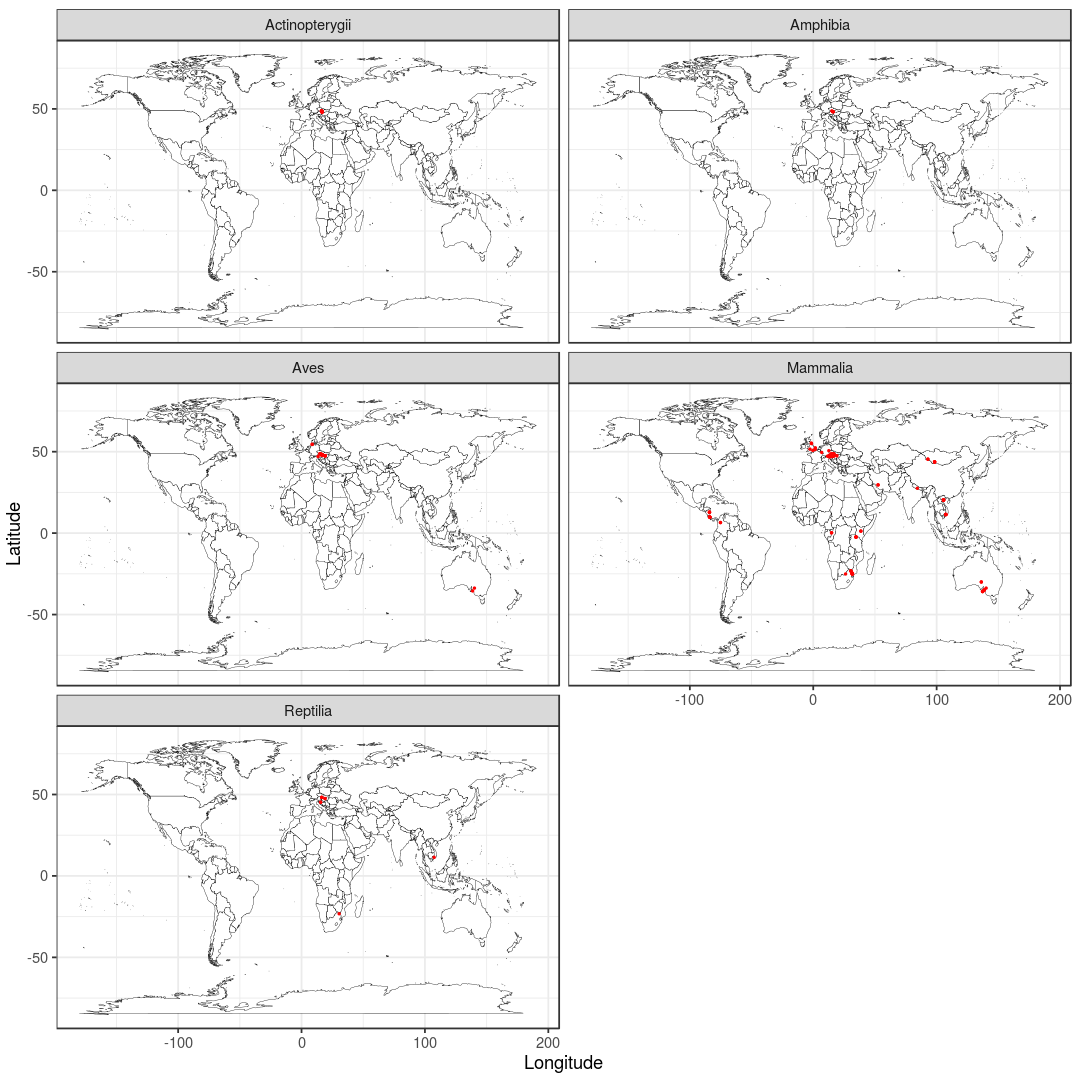

In [27]:
# mapping onto world map
world = map_data("world")

p = ggplot(world, aes(x=long, y=lat)) +
    geom_polygon(aes(group=group), fill = "white", colour = "black", size=0.1)  +
    geom_point(data=df_map, size=0.3, color='red') +
    labs(x='Longitude', y='Latitude') +
    facet_wrap(~class, ncol=2) +
    theme_bw() 

options(repr.plot.width=9, repr.plot.height=9)
plot_write(p, file='world-map.pdf')

# sessionInfo

In [28]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.1 LTS

Matrix products: default
BLAS: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRblas.so
LAPACK: /ebio/abt3_projects/software/miniconda3_gt4.4/envs/py3_physeq/lib/R/lib/libRlapack.so

locale:
[1] en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] maps_3.3.0      bindrcpp_0.2.2  stringr_1.3.1   ape_5.1        
[5] phyloseq_1.22.3 ggplot2_3.0.0   tidyr_0.8.1     dplyr_0.7.6    

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.17        lattice_0.20-34     Biostrings_2.46.0  
 [4] assertthat_0.2.0    digest_0.6.15       foreach_1.4.4      
 [7] IRdisplay_0.4.4     R6_2.2.2            plyr_1.8.4         
[10] repr_0.15.0         stats4_3.4.1        evaluate_0.10.1    
[13] pillar_1.2.2        zlibbioc_1.24.0     rlang_0.2.1        
[16] lazyeval_0.2.1      uuid_0.1